In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [8]:
#read data
df_ice_cream = pd.read_csv('ice_cream.csv')

In [10]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [11]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [12]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [13]:
#set date as index
df_ice_cream.set_index('date', inplace=True)

In [14]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [15]:
#show result
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


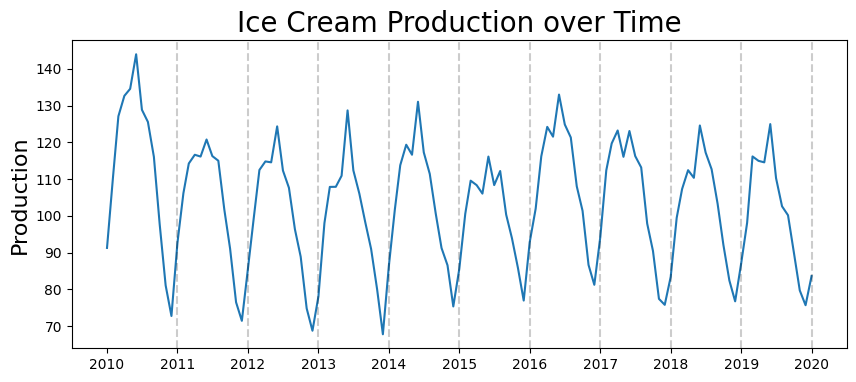

In [16]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF

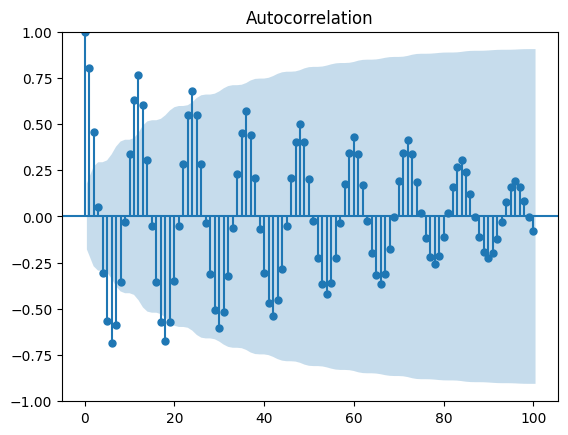

In [17]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

Based on decaying ACF, we are likely dealing with an Auto Regressive process

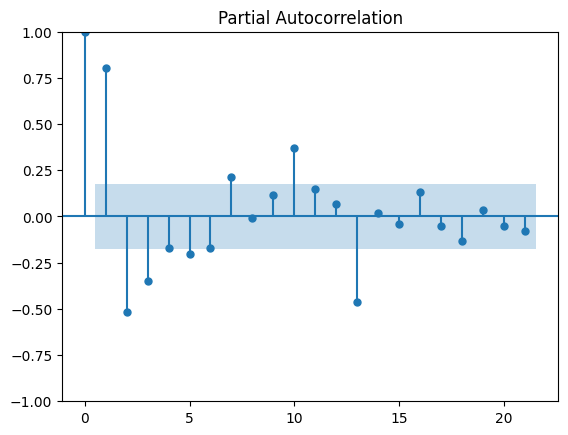

In [18]:
pacf_plot = plot_pacf(df_ice_cream.production)


Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

# STOCK

In [20]:
import yfinance as yf

In [21]:
#define the ticker symbol
tickerSymbol = 'SPY'

In [22]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [23]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')
tickerDf = tickerDf[['Close']]

In [24]:
#see your data
tickerDf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,174.265305
2015-01-05 00:00:00-05:00,171.118149
2015-01-06 00:00:00-05:00,169.506393
2015-01-07 00:00:00-05:00,171.618652
2015-01-08 00:00:00-05:00,174.664062


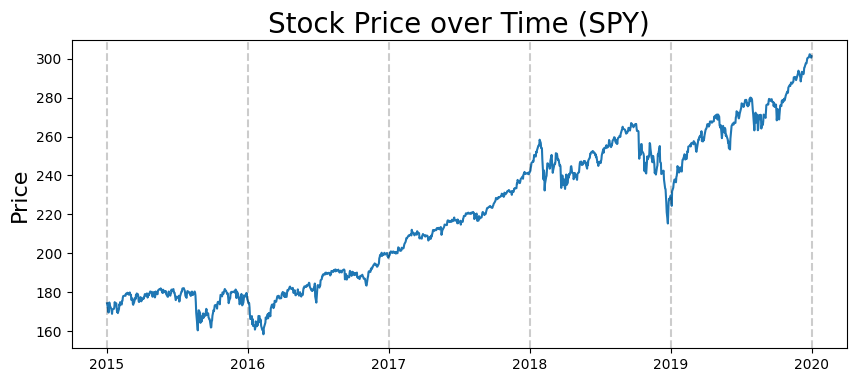

In [25]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)